In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import os
import warnings
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Abaikan peringatan NumPy
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [11]:
# Load data
x_tr_resample = pd.read_csv('../../Data/fix/X_train_smote.csv')
y_tr_resample = np.loadtxt("../../Data/fix/y_train_smote.csv", delimiter=",")

In [12]:
# Load scalers
minmax = joblib.load("../../Models/Tuning/minmax.pkl")
pt = joblib.load("../../Models/Tuning/powertransformer.pkl")

In [13]:
# Transform data
x_minmax_scaled = minmax.transform(x_tr_resample)
x_pt_scaled = pt.transform(x_tr_resample)

In [14]:
# Directory model
model_dir = "../../Models/Tuning/"

In [15]:
# Daftar model
model_names = ["LGBM", "ETC", "SVM", "GNB", "CATBOOST"]

In [ ]:
# Evaluasi loop
evaluation_results = []

for name in model_names:
    print(f"Evaluating {name}...")

    # Load model
    model_path = os.path.join(model_dir, f"MODEL-{name}.pkl")
    if not os.path.exists(model_path):
        print(f"Model {name} not found at {model_path}. Skipping...")
        continue

    loaded_model = joblib.load(model_path)
    print(f"{name} model loaded from {model_path}")

    # Prediksi
    if name == "SVM":
        y_pred = loaded_model.predict(x_minmax_scaled)
    elif name == "GNB":
        y_pred = loaded_model.predict(x_pt_scaled)
    else:
        y_pred = loaded_model.predict(x_tr_resample)

    # Compute Metrics
    accuracy = accuracy_score(y_tr_resample, y_pred) * 100
    precision = precision_score(y_tr_resample, y_pred, zero_division=0) * 100
    recall = recall_score(y_tr_resample, y_pred, zero_division=0) * 100
    f1 = f1_score(y_tr_resample, y_pred, zero_division=0) * 100

    # Tampilkan metrik di konsol
    print(f"Accuracy: {accuracy:.2f}%, Precision: {precision:.2f}%, Recall: {recall:.2f}%, F1: {f1:.2f}%")

    # Simpan hasil evaluasi
    evaluation_results.append([name, accuracy, precision, recall, f1])
    print(f"{name} evaluation completed.\n")

Evaluating LGBM...
LGBM model loaded from ../../Models/Tuning/MODEL-LGBM.pkl
Accuracy: 100.00%, Precision: 100.00%, Recall: 100.00%, F1: 100.00%
LGBM evaluation completed.

Evaluating ETC...
ETC model loaded from ../../Models/Tuning/MODEL-ETC.pkl
Accuracy: 99.94%, Precision: 100.00%, Recall: 99.89%, F1: 99.94%
ETC evaluation completed.

Evaluating SVM...
SVM model loaded from ../../Models/Tuning/MODEL-SVM.pkl
Accuracy: 100.00%, Precision: 100.00%, Recall: 100.00%, F1: 100.00%
SVM evaluation completed.

Evaluating GNB...
GNB model loaded from ../../Models/Tuning/MODEL-GNB.pkl
Accuracy: 94.74%, Precision: 93.68%, Recall: 95.95%, F1: 94.80%
GNB evaluation completed.

Evaluating CATBOOST...
CATBOOST model loaded from ../../Models/Tuning/MODEL-CATBOOST.pkl
Accuracy: 99.97%, Precision: 100.00%, Recall: 99.93%, F1: 99.97%
CATBOOST evaluation completed.



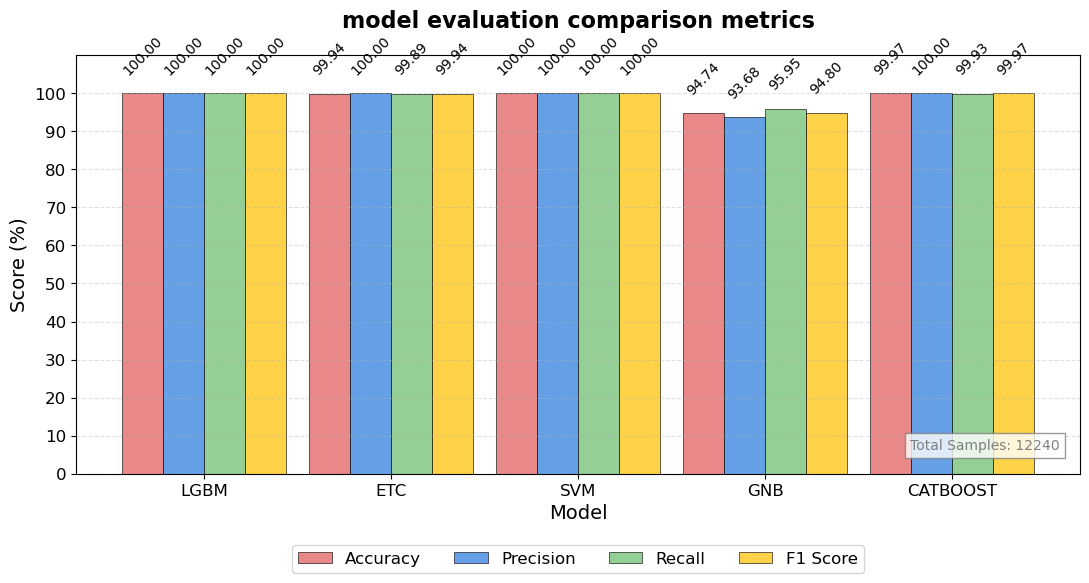

In [17]:
#  Membuat DataFrame dari list results
results_df = pd.DataFrame(evaluation_results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])

# Variabel untuk plotting
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
models = results_df["Model"]
n_metrics = len(metrics)
n_models = len(models)

# Siapkan posisi bar
x = np.arange(n_models)
width = 0.22  # Lebar bar

# Buat figure
fig, ax = plt.subplots(figsize=(11, 6))

# Plot bar untuk setiap metrik
colors = ['#E57373', '#4A90E2', '#81C784', '#FFCA28']  # Red, blue, green, yellow (lembut)
for i, metric in enumerate(metrics):
    ax.bar(x + i * width, results_df[metric], width, label=metric,
           color=colors[i], alpha=0.85, edgecolor='black', linewidth=0.5)

# Kustomisasi plot
ax.set_title('model evaluation comparison metrics', fontsize=16, pad=20, weight='bold')
ax.set_xlabel('Model', fontsize=14)
ax.set_ylabel('Score (%)', fontsize=14)
ax.set_xticks(x + width * (n_metrics - 1) / 2)
ax.set_xticklabels(models, fontsize=12)
ax.set_yticks(np.arange(0, 101, 10))
ax.set_yticklabels(np.arange(0, 101, 10), fontsize=12)
ax.legend(fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
ax.grid(True, axis='y', linestyle='--', alpha=0.4)
ax.set_ylim(0, 110)

# Tambahkan angka di atas bar
for i, metric in enumerate(metrics):
    for j, value in enumerate(results_df[metric]):
        ax.text(j + i * width, value + 5, f'{value:.2f}',
                ha='center', fontsize=10, color='black', weight='medium', rotation=45)

# Tambahkan anotasi total sampel di kanan bawah
ax.text(0.98, 0.05, f'Total Samples: {len(y_tr_resample)}',
        transform=ax.transAxes, fontsize=10, color='gray',
        ha='right', va='bottom', bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

plt.tight_layout()
# plt.savefig("../picture/Eval_Tuning_Params/EVAL_METRIKS/model_performance.png", dpi=300, bbox_inches='tight')
plt.show()

# print("\nVisualisasi telah disimpan di '../picture/Feature_Selection/'")